<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import math
import os
import numpy as np

In [24]:
(X_Train,_),(_,_) = mnist.load_data()

In [25]:
print(X_Train.shape)
print(type(X_Train))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [26]:
#Normalize the Data between -1 and 1
X_Train = (X_Train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [27]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [28]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
#generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
#generator.add(UpSampling2D())
#generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
#generator.add(UpSampling2D())
#generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784,activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 784)              

In [29]:
#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [37]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    out_path = '/content/images/gan_output_epoch_'
    out_dir = os.path.dirname(out_path)
    plt.savefig(out_dir+'{0}.png'.format(epoch+1))
    plt.show()

In [31]:
X_Train = X_Train.reshape(-1,784)
X_Train.shape

(60000, 784)

Epoch 1 D loss: 150.615025 G loss: 242.800269
Epoch 2 D loss: 150.628957 G loss: 241.084079
Epoch 3 D loss: 150.465877 G loss: 242.378029
Epoch 4 D loss: 151.150748 G loss: 242.467142
Epoch 5 D loss: 151.697155 G loss: 237.586489
Epoch 6 D loss: 151.467416 G loss: 241.254428
Epoch 7 D loss: 151.420082 G loss: 241.813712
Epoch 8 D loss: 151.842896 G loss: 240.701744
Epoch 9 D loss: 152.645515 G loss: 239.568936
Epoch 10 D loss: 153.177228 G loss: 235.966138


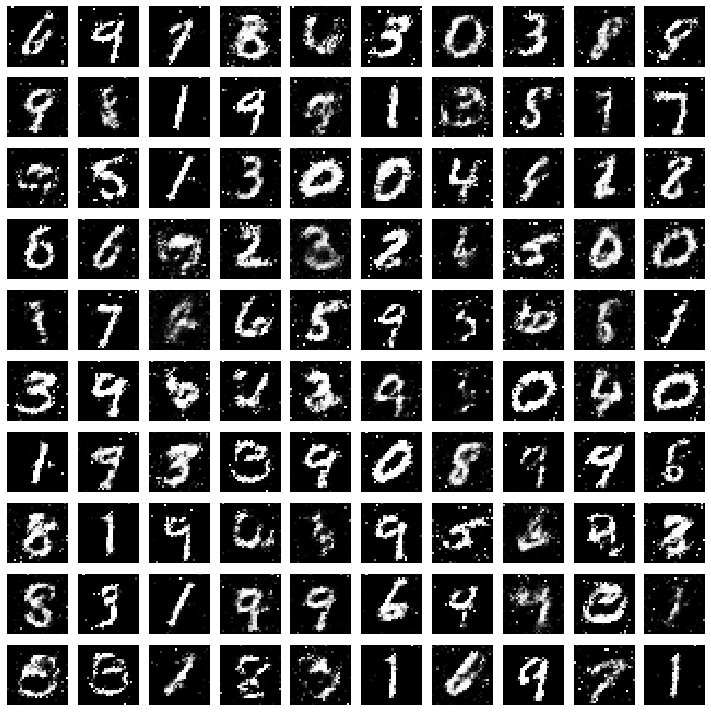

Epoch 11 D loss: 153.505947 G loss: 236.321797
Epoch 12 D loss: 153.808076 G loss: 235.354563
Epoch 13 D loss: 154.283430 G loss: 234.118298
Epoch 14 D loss: 153.541049 G loss: 237.812472
Epoch 15 D loss: 153.935176 G loss: 237.580427
Epoch 16 D loss: 154.055858 G loss: 236.392695
Epoch 17 D loss: 154.138950 G loss: 236.310465
Epoch 18 D loss: 154.583541 G loss: 234.479912
Epoch 19 D loss: 154.613521 G loss: 235.090043
Epoch 20 D loss: 154.738380 G loss: 233.997303


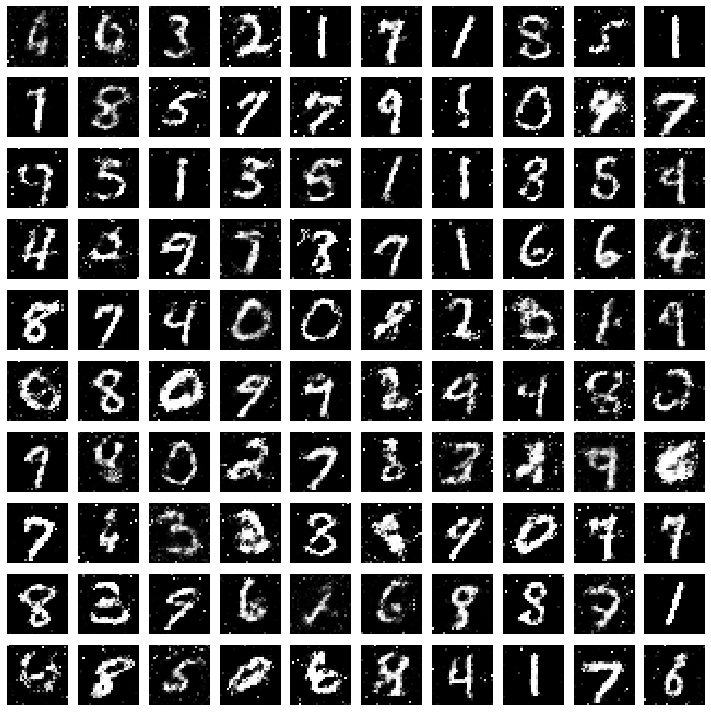

Epoch 21 D loss: 154.876888 G loss: 233.905407
Epoch 22 D loss: 155.328414 G loss: 232.071565
Epoch 23 D loss: 154.914613 G loss: 234.700473
Epoch 24 D loss: 155.174668 G loss: 233.627489
Epoch 25 D loss: 155.201918 G loss: 233.353425
Epoch 26 D loss: 155.135063 G loss: 234.921545
Epoch 27 D loss: 154.948820 G loss: 234.992695
Epoch 28 D loss: 154.721524 G loss: 235.116745
Epoch 29 D loss: 155.147581 G loss: 234.580633
Epoch 30 D loss: 155.263266 G loss: 235.373979


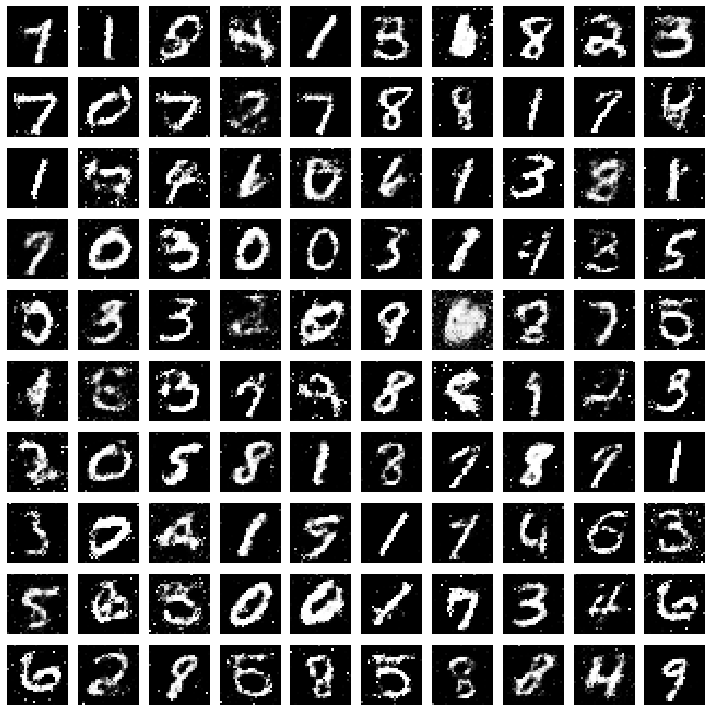

Epoch 31 D loss: 155.269746 G loss: 233.943380
Epoch 32 D loss: 155.639290 G loss: 232.805196
Epoch 33 D loss: 155.409328 G loss: 233.833499
Epoch 34 D loss: 155.731641 G loss: 233.848204
Epoch 35 D loss: 155.367706 G loss: 233.817023
Epoch 36 D loss: 155.681007 G loss: 233.740541
Epoch 37 D loss: 155.586277 G loss: 234.647204
Epoch 38 D loss: 155.410479 G loss: 232.325663
Epoch 39 D loss: 155.725638 G loss: 231.570187
Epoch 40 D loss: 156.135060 G loss: 231.965656


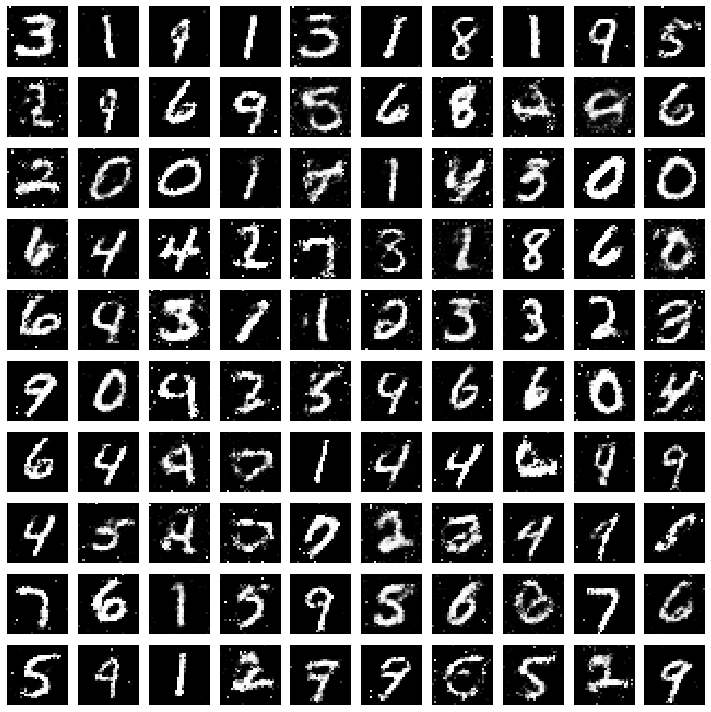

Epoch 41 D loss: 156.058745 G loss: 232.896155
Epoch 42 D loss: 155.735965 G loss: 232.487816
Epoch 43 D loss: 155.864403 G loss: 232.546261
Epoch 44 D loss: 155.661188 G loss: 232.018785
Epoch 45 D loss: 155.719525 G loss: 233.261302
Epoch 46 D loss: 155.833214 G loss: 232.515293
Epoch 47 D loss: 155.617343 G loss: 234.119213
Epoch 48 D loss: 155.615716 G loss: 234.017535
Epoch 49 D loss: 155.802841 G loss: 234.796561
Epoch 50 D loss: 155.759688 G loss: 233.121879


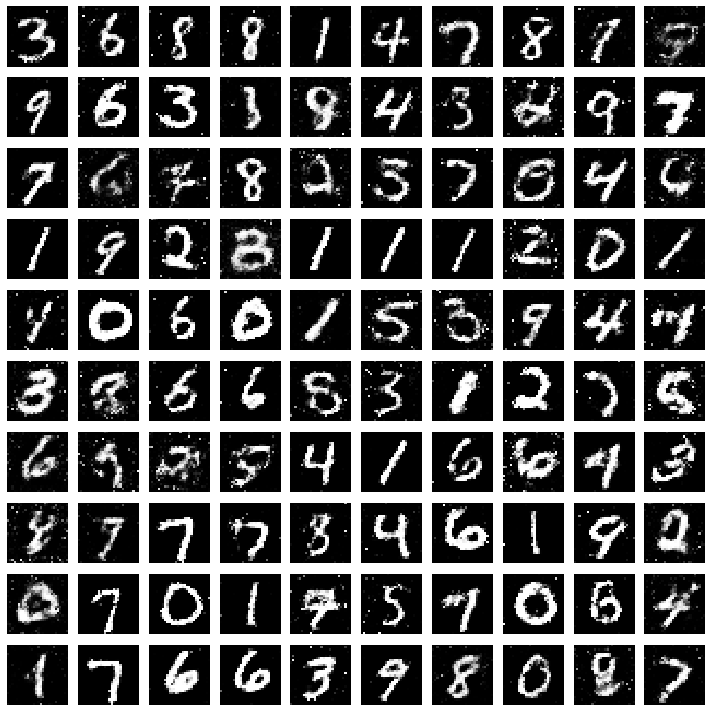

In [39]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        output_path = '/content/models/gan_generator_'
        output_dir = os.path.dirname(output_path)
        generator.save(output_dir+'{0}.h5'.format(epoch+1))
        save_imgs(epoch)

In [42]:
!ls

images10.png  images30.png  models10.h5  models2.h5   models50.h5
images1.png   images40.png  models1.h5	 models30.h5  sample_data
images20.png  images50.png  models20.h5  models40.h5


In [50]:
from google.colab import files
for i in range(10,51,10):
    files.download('/content/images{}.png'.format(i))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>